<a href="https://colab.research.google.com/github/jaouni24/Diabetes-Classification/blob/main/DiabetesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification

In this notebook, we begin by uploading the dataset and then explore diabetes classification using various machine learning models. The process includes data preprocessing, analysis, and dimensionality reduction to improve classification accuracy. We implement and compare models like SVM, MLP, and RF to determine the best-performing approach.


In [ ]:
from google.colab import files
uploaded = files.upload()  # Opens a file dialog for upload

Saving diabetes+dataset.csv to diabetes+dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes+dataset.csv')
print(df.head())

                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...     

## EDA

We begin the EDA by inspecting the features in the dataset and their data types using `df.info()`. This step helps us understand the structure of the dataset, identify any missing values, and assess the types of data (e.g., numerical, categorical) that will inform our preprocessing steps.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [ ]:
df.isnull().sum()

,0
Target,0
Genetic Markers,0
Autoantibodies,0
Family History,0
Environmental Factors,0
Insulin Levels,0
Age,0
BMI,0
Physical Activity,0
Dietary Habits,0


The dataset is cleaned from missing values.

We use `df.describe()` to get a statistical summary of the numerical features, providing insights into the distribution, mean, and range of each feature.

In [ ]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


Check if there is empty records.

In [ ]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")

Number of empty records = 0


In [ ]:
features_objects = [
    'Target', 'Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors',
    'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
    'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes',
    'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing',
    'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms'
]

for feature in features_objects:
    num_unique_makes = df[feature].nunique()
    print(f"Number of distinct values in '{feature}' column: {num_unique_makes}")

Number of distinct values in 'Target' column: 13
Number of distinct values in 'Genetic Markers' column: 2
Number of distinct values in 'Autoantibodies' column: 2
Number of distinct values in 'Family History' column: 2
Number of distinct values in 'Environmental Factors' column: 2
Number of distinct values in 'Physical Activity' column: 3
Number of distinct values in 'Dietary Habits' column: 2
Number of distinct values in 'Ethnicity' column: 2
Number of distinct values in 'Socioeconomic Factors' column: 3
Number of distinct values in 'Smoking Status' column: 2
Number of distinct values in 'Alcohol Consumption' column: 3
Number of distinct values in 'Glucose Tolerance Test' column: 2
Number of distinct values in 'History of PCOS' column: 2
Number of distinct values in 'Previous Gestational Diabetes' column: 2
Number of distinct values in 'Pregnancy History' column: 2
Number of distinct values in 'Cystic Fibrosis Diagnosis' column: 2
Number of distinct values in 'Steroid Use History' colu

It can be observed that the target variable has 13 distinct values, while other categorical features range from 2 to 4 distinct values. To optimize encoding, the target variable can be encoded using label encoding, while one-hot encoding is more suitable for the Target.

In [ ]:
import pandas as pd

# Display distinct values for the 'Target' column
distinct_values = df['Target'].unique()
print("Distinct values for 'Target' feature:", distinct_values)

Distinct values for 'Target' feature: ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY']


Before proceeding with encoding, we will visualize the frequency distribution of each categorical feature using histograms. This will help us assess the balance of the categorical features within the dataset.

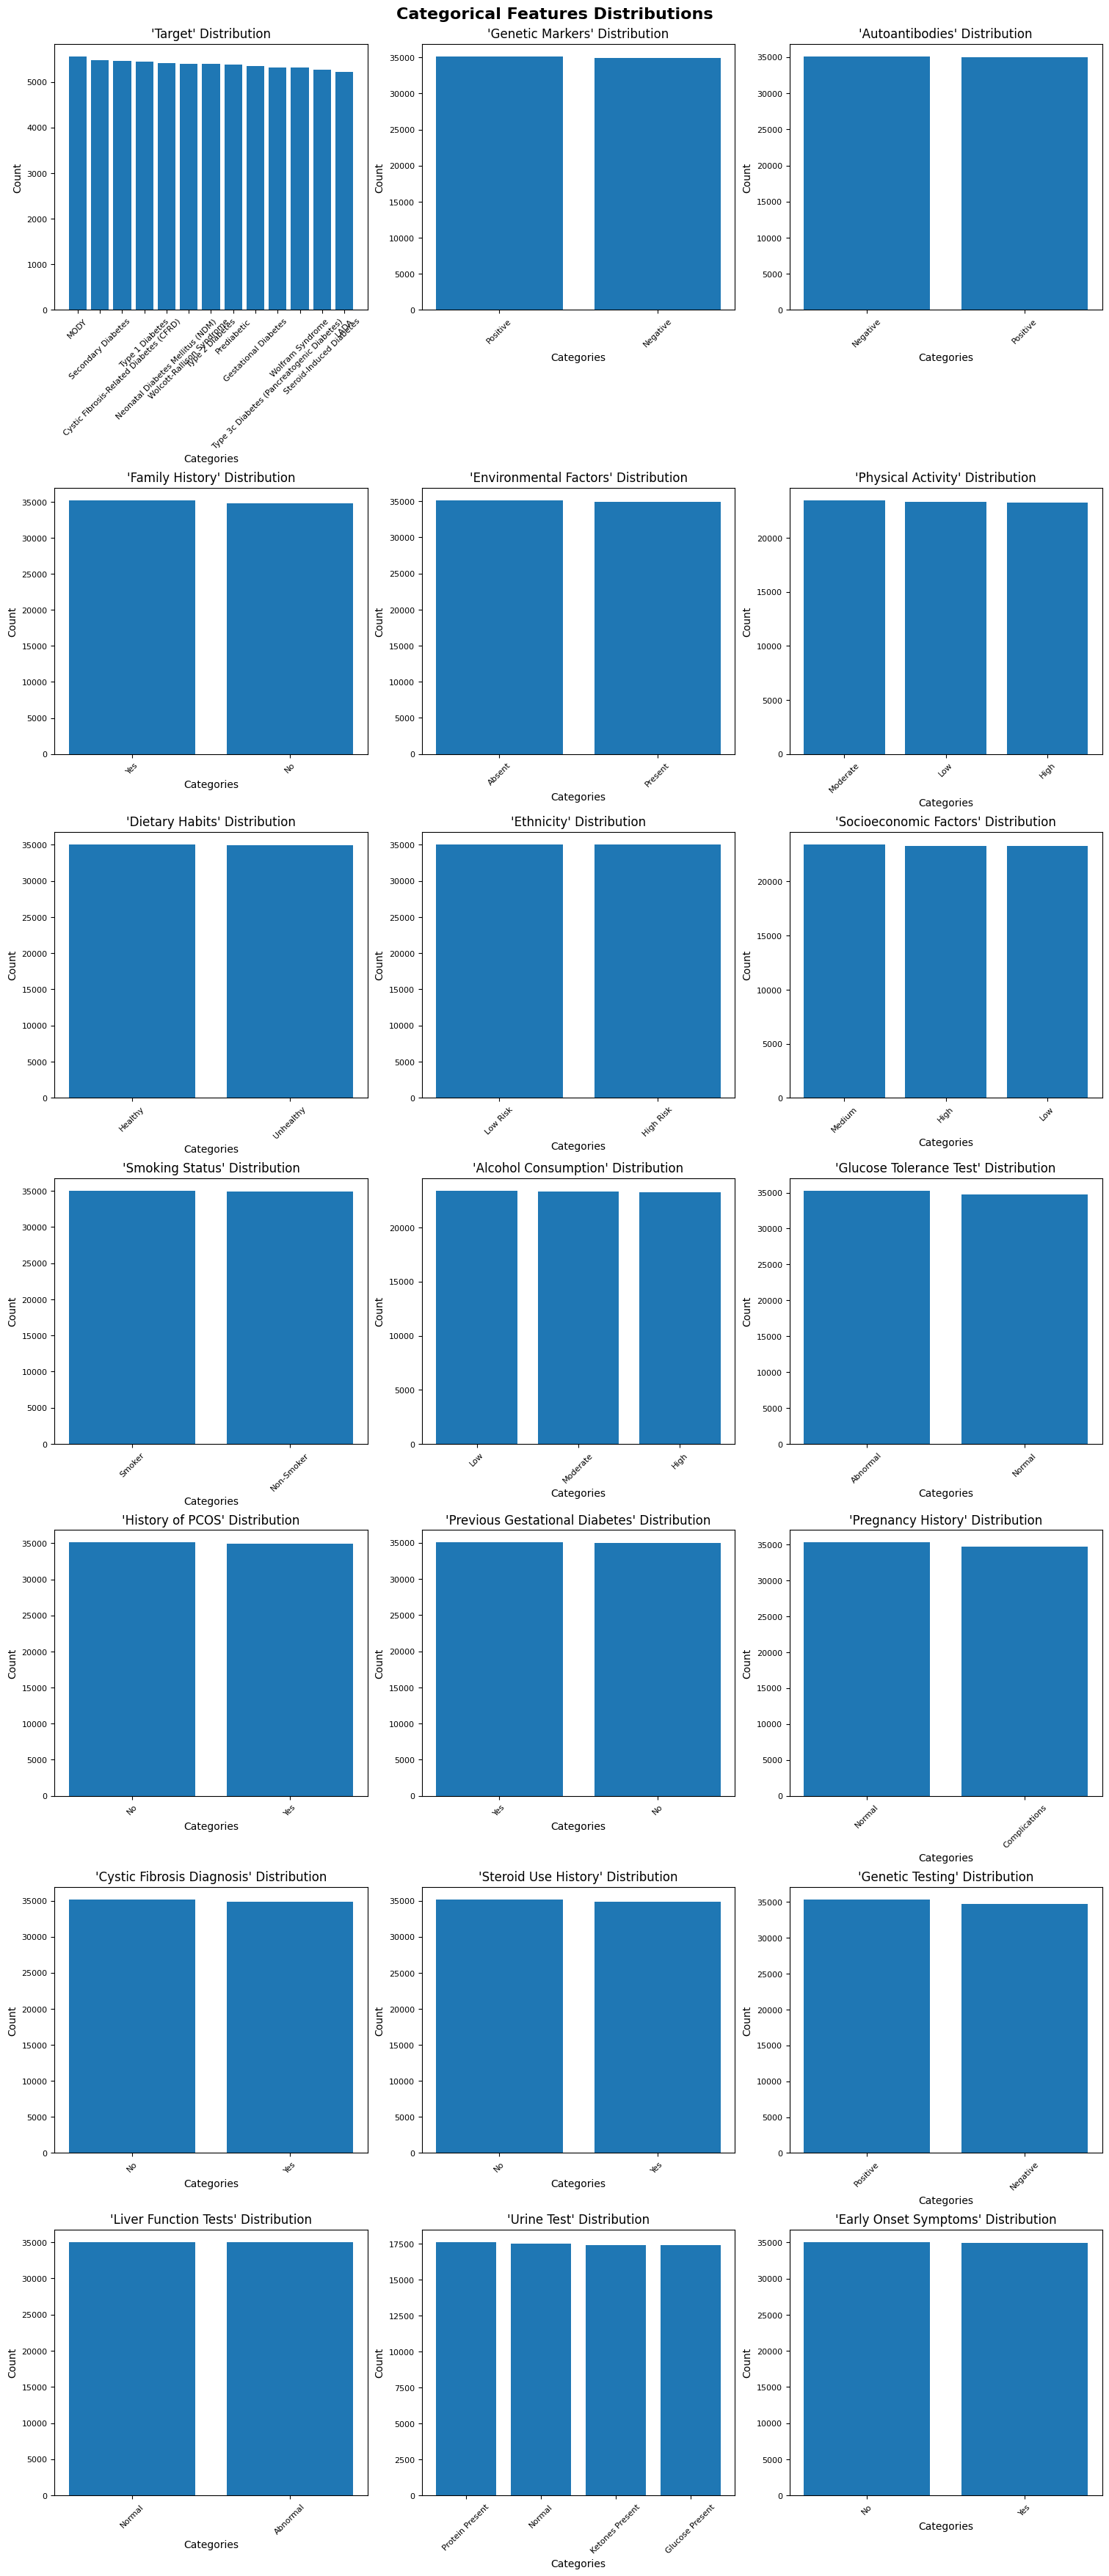

In [ ]:
import matplotlib.pyplot as plt
import math

# Determine the grid size
num_features = len(features_objects)
cols = 3  # Number of columns
rows = math.ceil(num_features / cols)  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features_objects):
    counts = df[feature].value_counts()

    # Plot the histogram
    axes[idx].bar(counts.index, counts.values)
    axes[idx].set_title(f"'{feature}' Distribution", fontsize=12)
    axes[idx].set_xlabel("Categories", fontsize=10)
    axes[idx].set_ylabel("Count", fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].tick_params(axis='y', labelsize=8)

# Hide unused subplots
for ax in axes[num_features:]:
    ax.axis('off')

# Add a main title for the entire figure
fig.suptitle("Categorical Features Distributions", fontsize=16, fontweight='bold')

plt.show()


From the plots, we can observe that the data is well-balanced, as the number of samples for each category within the features is approximately equal.

Now, label encoding is going to be performed for the 'Target'.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for the Target feature
label_encoder = LabelEncoder()

# Apply Label Encoding to the Target feature and overwrite the original column
df['Target'] = label_encoder.fit_transform(df['Target'])

# Display the resulting DataFrame
print(df.head())

   Target Genetic Markers Autoantibodies Family History Environmental Factors  \
0       7        Positive       Negative             No               Present   
1       4        Positive       Negative             No               Present   
2       5        Positive       Positive            Yes               Present   
3       8        Negative       Positive             No               Present   
4      12        Negative       Negative            Yes               Present   

   Insulin Levels  Age  BMI Physical Activity Dietary Habits  ...  \
0              40   44   38              High        Healthy  ...   
1              13    1   17              High        Healthy  ...   
2              27   36   24              High      Unhealthy  ...   
3               8    7   16               Low      Unhealthy  ...   
4              17   10   17              High        Healthy  ...   

   Pulmonary Function  Cystic Fibrosis Diagnosis  Steroid Use History  \
0                  76    

The label encoding for the target feature will repalce each value with a numerical number.

The following features have a small number of distinct values, ranging from 2 to 4: `Genetic Markers`, `Autoantibodies`, `Family History`, `Environmental Factors`, `Physical Activity`, `Dietary Habits`, `Ethnicity`, `Socioeconomic Factors`, `Smoking Status`, `Alcohol Consumption`, `Glucose Tolerance Test`, `History of PCOS`, `Previous Gestational Diabetes`, `Pregnancy History`, `Cystic Fibrosis Diagnosis`, `Steroid Use History`, `Genetic Testing`, `Liver Function Tests`, `Urine Test`, and `Early Onset Symptoms`. Given this limited range, one-hot encoding is an appropriate preprocessing method for these categorical features. This approach replaces each distinct value of a feature with a separate column, where the value `1` indicates the presence of the corresponding category and `0` otherwise.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# List of features to one-hot encode
features_onehot_encoded = [
    'Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors',
    'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
    'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes',
    'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing',
    'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms'
]

# Initialize the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore')

# Loop through each feature in the features_onehot_encoded list
for feature in features_onehot_encoded:
    # Fit the encoder on the feature column and transform it to a one-hot encoded array
    encoded_data = enc.fit_transform(df[[feature]]).toarray()

    # Create column names for the one-hot encoded features
    encoded_columns = [f"{feature}_{cat}" for cat in enc.categories_[0]]

    # Add the one-hot encoded columns to the original DataFrame
    df[encoded_columns] = encoded_data

# Drop the original categorical columns after encoding
df.drop(columns=features_onehot_encoded, inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())


   Target  Insulin Levels  Age  BMI  Blood Pressure  Cholesterol Levels  \
0       7              40   44   38             124                 201   
1       4              13    1   17              73                 121   
2       5              27   36   24             121                 185   
3       8               8    7   16             100                 151   
4      12              17   10   17             103                 146   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0                   50                   168                            18   
1                   24                   178                             8   
2                   36                   105                            15   
3                   29                   121                            12   
4                   33                   289                             2   

   Pancreatic Health  ...  Genetic Testing_Negative  Genetic Testing_Positive  \

Notice that the number of columns (or features) became 59 after performing one-hot encoding for the categoral features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Target                             70000 non-null  int64  
 1   Insulin Levels                     70000 non-null  int64  
 2   Age                                70000 non-null  int64  
 3   BMI                                70000 non-null  int64  
 4   Blood Pressure                     70000 non-null  int64  
 5   Cholesterol Levels                 70000 non-null  int64  
 6   Waist Circumference                70000 non-null  int64  
 7   Blood Glucose Levels               70000 non-null  int64  
 8   Weight Gain During Pregnancy       70000 non-null  int64  
 9   Pancreatic Health                  70000 non-null  int64  
 10  Pulmonary Function                 70000 non-null  int64  
 11  Neurological Assessments           70000 non-null  int

Now let's try to visulize the non-categoral features using histograms and boxplots.

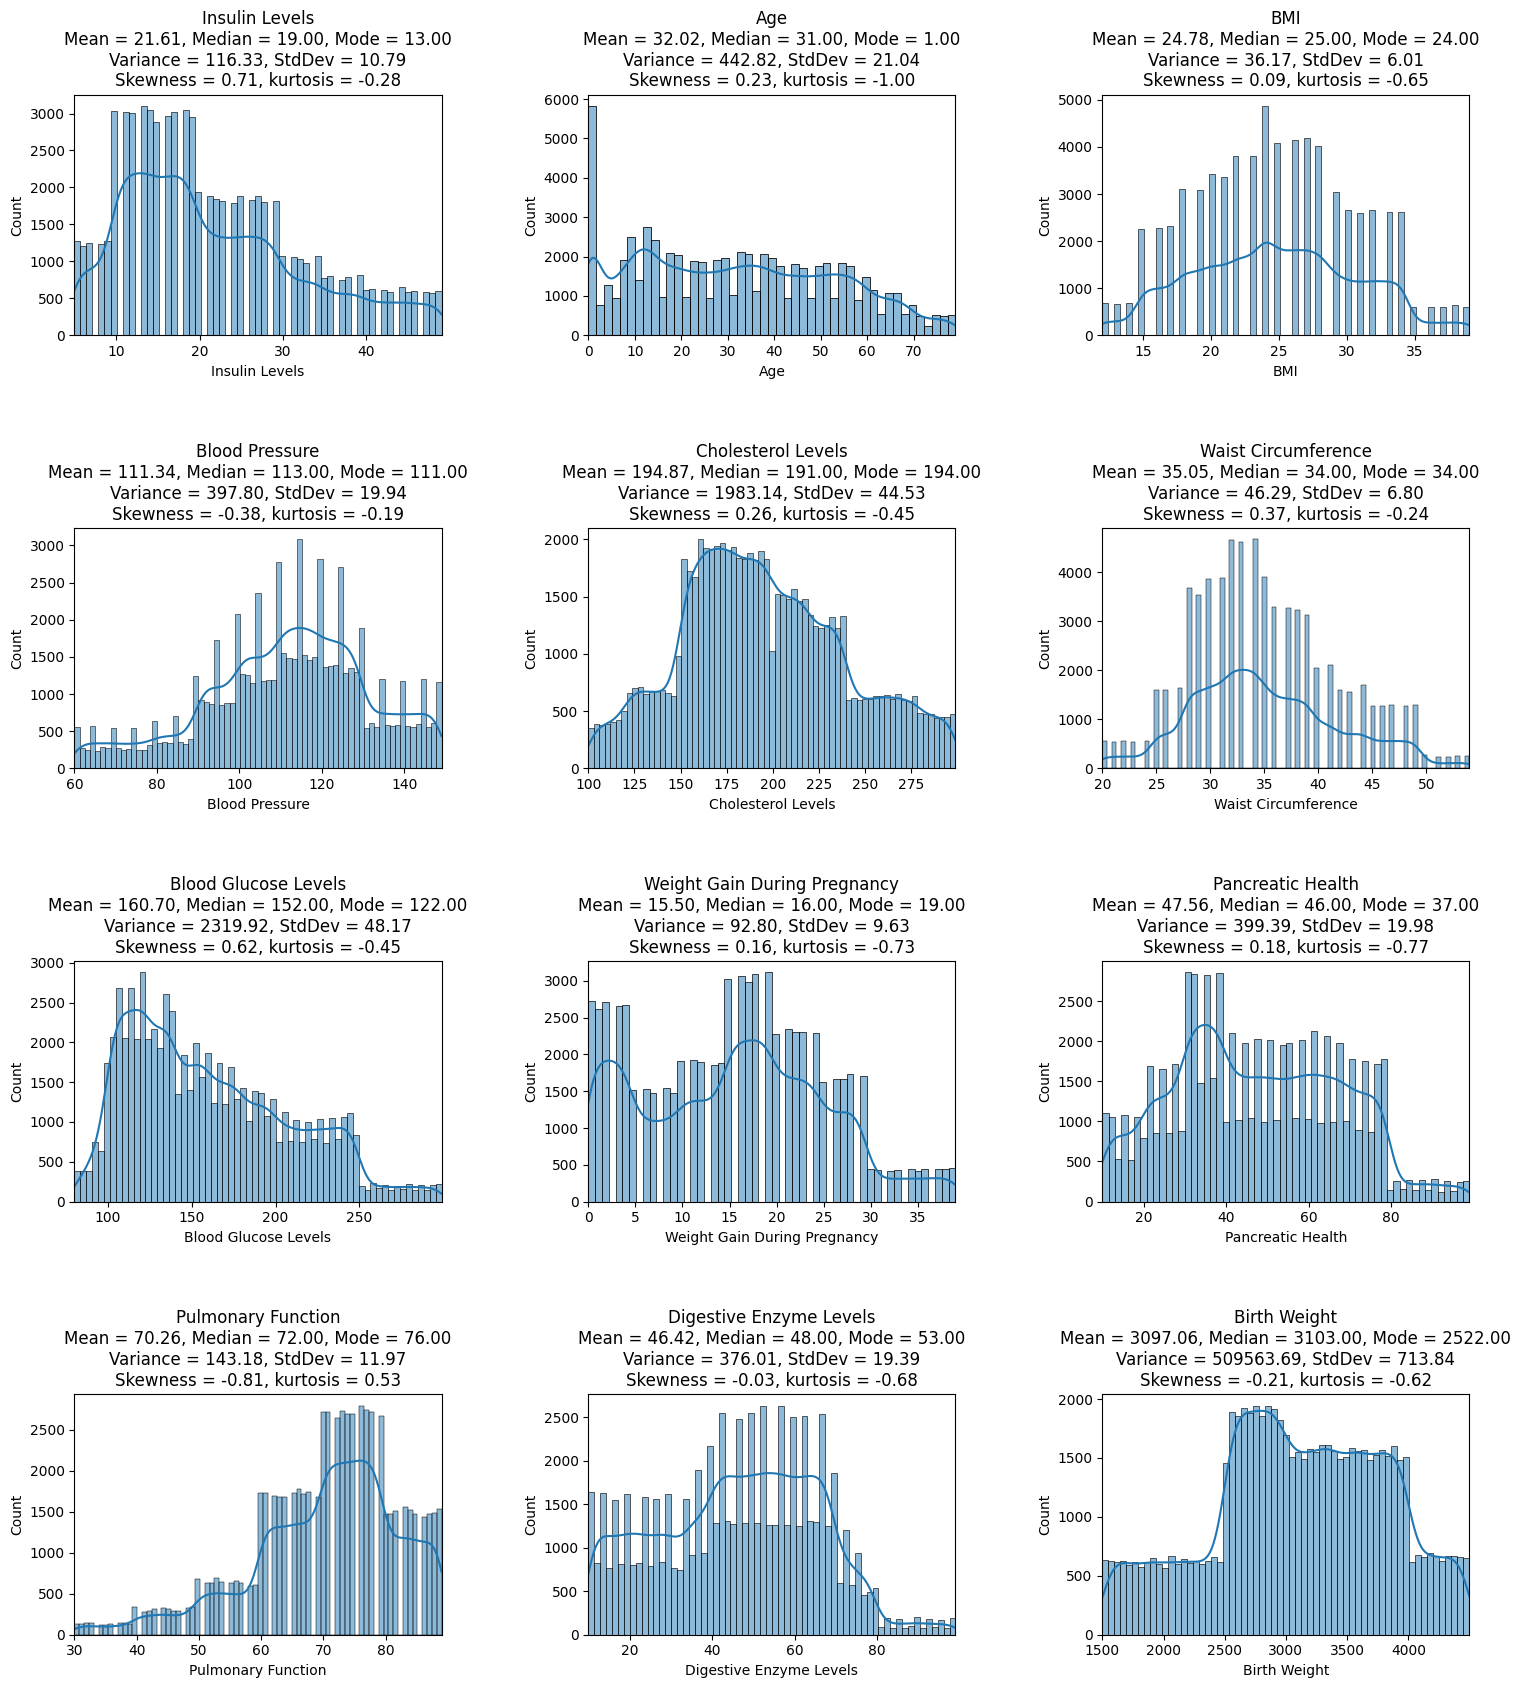

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of features to plot
features = [
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels",
    "Waist Circumference", "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Digestive Enzyme Levels", "Birth Weight"
]

# Calculate central tendency and distribution metrics
Mean = df[features].mean().values
Median = df[features].median().values
Mode = df[features].mode().iloc[0].values
Variance = df[features].var().values
StdDev = df[features].std().values
Skewness = df[features].skew().values
Kurtosis = df[features].kurtosis().values

# Set up the plot grid
n_features = len(features)
ncols = 3
nrows = (n_features + ncols - 1) // ncols  # Calculate rows needed
fig, axs = plt.subplots(figsize=(18, nrows * 5), ncols=ncols, nrows=nrows)

# Flatten axes for easier iteration if there are multiple rows
axs = axs.flatten()

# Loop through each feature and plot
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, ax=axs[i], kde=True)
    axs[i].set_title(
        f"{feature}\n"
        f"Mean = {Mean[i]:.2f}, Median = {Median[i]:.2f}, Mode = {Mode[i]:.2f}\n"
        f"Variance = {Variance[i]:.2f}, StdDev = {StdDev[i]:.2f}\n"
        f"Skewness = {Skewness[i]:.2f}, kurtosis = {Kurtosis[i]:.2f}"
    )
    axs[i].set_xlim(df[feature].min(), df[feature].max())

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout for better spacing
fig.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()

This code is designed to visualize the distribution of selected numerical features in a dataset. By plotting histograms with kernel density estimates (KDE) for each feature, it provides insights into their central tendency (mean, median, mode), variability (variance, standard deviation), and shape (skewness and kurtosis).

We can observe that some features as almost normally distributed since they have almost equal mead, median and mode such as BMI, Waist Circomfrenece, Cholestrol Level and Blood Pressur. Other features have skewness which may be an indication for outlaiers such as Pulmonary Function, Blood Glucose Level and Insulie Level.


The above plots suggest that some features may contain outliers. To confirm this, we can create boxplots for each numerical feature.

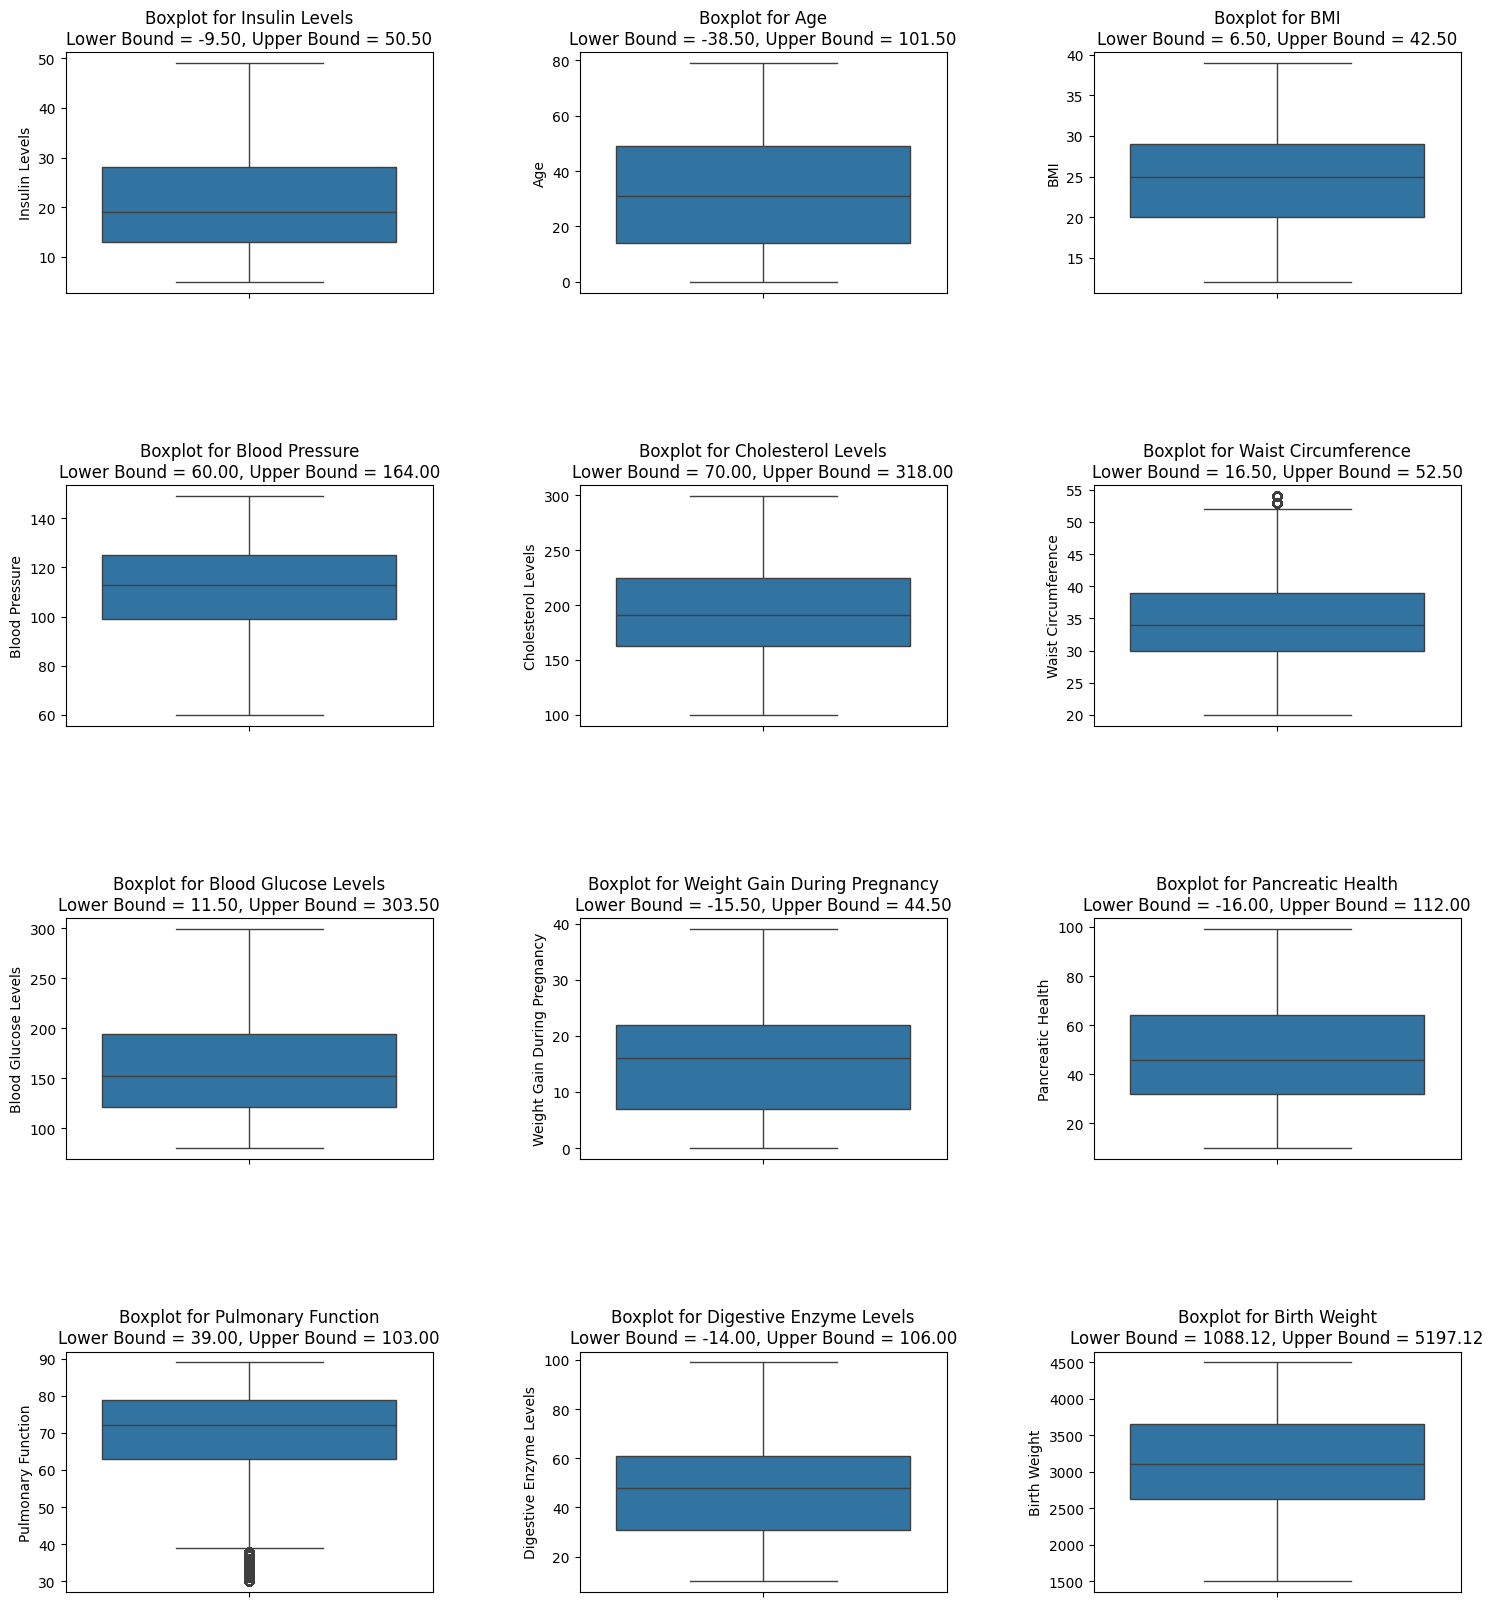

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of features to plot
features = [
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels",
    "Waist Circumference", "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Digestive Enzyme Levels", "Birth Weight"
]

# Initialize a dictionary to store lower and upper bounds
lower_bounds = {}
upper_bounds = {}

# Calculate IQR, lower bound, and upper bound for each feature
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the bounds in the dictionary
    lower_bounds[feature] = lower_bound
    upper_bounds[feature] = upper_bound

# Set up the plot grid
n_features = len(features)
ncols = 3
nrows = (n_features + ncols - 1) // ncols  # Calculate rows needed
fig, axs = plt.subplots(figsize=(18, nrows * 5), ncols=ncols, nrows=nrows)

# Flatten axes for easier iteration if there are multiple rows
axs = axs.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(features):
    # sns.boxplot(data=df, x='Physical Activity', y=feature, ax=axs[i])
    # sns.boxplot(data=df, x='Pregnancy History', y=feature, ax=axs[i])
    sns.boxplot(data=df, y=feature, ax=axs[i])
    axs[i].set_title(f"Boxplot for {feature}\nLower Bound = {lower_bounds[feature]:.2f}, Upper Bound = {upper_bounds[feature]:.2f}")

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout for better spacing
fig.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()


The boxplots reveal that Waist Circumference and Pulmonary Function contain potential outliers. To confirm whether these data points should be classified as outliers, it is important to revisit the distribution measures, such as skewness and kurtosis, to make more informed decisions.

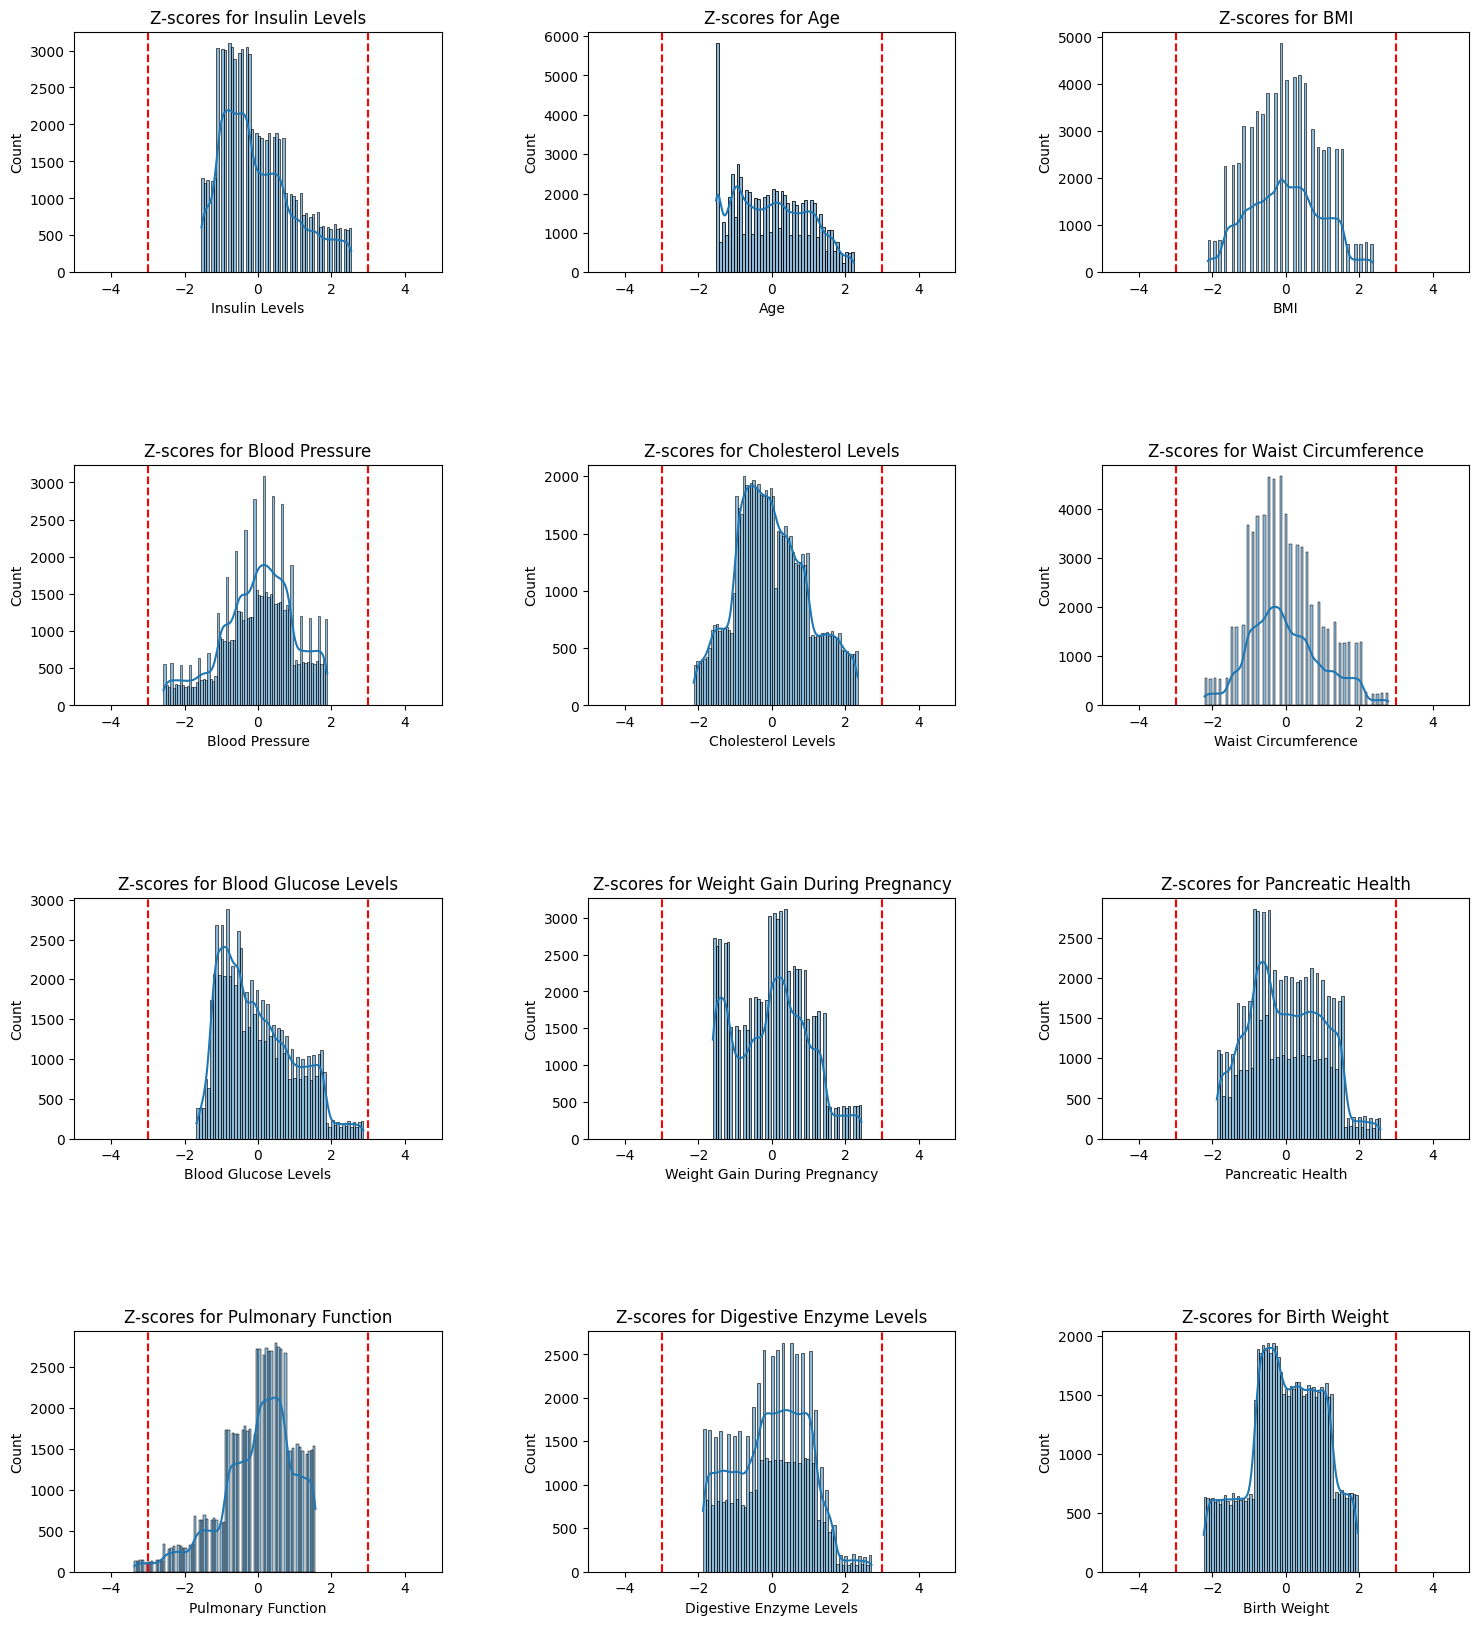

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# List of features to plot
features = [
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels",
    "Waist Circumference", "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Digestive Enzyme Levels", "Birth Weight"
]

# Initialize a dictionary to store Z-scores
z_scores = {}

# Calculate Z-scores for each feature
for feature in features:
    z_scores[feature] = zscore(df[feature])

# Set up the plot grid
n_features = len(features)
ncols = 3
nrows = (n_features + ncols - 1) // ncols  # Calculate rows needed
fig, axs = plt.subplots(figsize=(18, nrows * 5), ncols=ncols, nrows=nrows)

# Flatten axes for easier iteration if there are multiple rows
axs = axs.flatten()

# Loop through each feature and plot the Z-scores
for i, feature in enumerate(features):
    sns.histplot(z_scores[feature], kde=True, ax=axs[i])
    axs[i].set_title(f"Z-scores for {feature}")
    axs[i].set_xlim(-5, 5)  # To clearly show the Z-scores distribution

    # Mark potential outliers (Z-scores > 3 or < -3)
    axs[i].axvline(x=3, color='red', linestyle='--', label='Z = 3')
    axs[i].axvline(x=-3, color='red', linestyle='--', label='Z = -3')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout for better spacing
fig.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()

When the threshold is set to 2.5 (indicating higher sensitivity), potential outliers appear in features such as **Insulin Level**, **Blood Pressure**, **Waist Circumference**, **Blood Glucose Level**, **Pancreatic Health**, **Pulmonary Function**, and **Digestive Enzyme Level**. However, when the threshold is less sensitive (set to 3), only **Pulmonary Function** retains its outliers.

Based on these observations, we will focus on testing for outliers in **Waist Circumference** and **Pulmonary Function**. Features such as **Pancreatic Health**, **Digestive Enzyme Level**, **Insulin Level**, and **Blood Pressure** will not be considered as outliers because their values are not significantly far from the threshold and do not persist as outliers when sensitivity decreases.

Additionally, **Blood Glucose Level** will not be treated as having outliers because, based on domain expertise, levels higher than 126 mg/dL indicate some form of diabetes, and values can go as high as 400 mg/dL in severe cases. These values, while extreme, are expected within the context of the dataset and should not be considered anomalies.

since waist circomfrence is almost noramly distributed I will use the z-score to try to take decitions and actions to the outlaiers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming the dataset is loaded into a DataFrame called `df`
# Calculate Z-scores for the Waist Circumference feature
df['Waist Circumference Z-Score'] = zscore(df['Waist Circumference'])

# Define the Z-score threshold
z_threshold = 2.5
# z_threshold = 3

# Identify outliers based on the Z-score threshold
outliers = df[(df['Waist Circumference Z-Score'] > z_threshold) | (df['Waist Circumference Z-Score'] < -z_threshold)]

# Calculate the number and percentage of outliers
num_outliers = len(outliers)
total_entries = len(df)
outliers_percentage = (num_outliers / total_entries) * 100

# Print the results
print(f"Number of outliers for Waist Circumference: {num_outliers}")
print(f"Percentage of outliers: {outliers_percentage:.2f}%")

Number of outliers for Waist Circumference: 522
Percentage of outliers: 0.75%


we can notice that when the threshold was 2.5 there was 522 outlaiers but when decreased the sensitivity there were no outlaiers in the dataset. to get sure if they are really outlaiers or not, let's display the correlation matricx to know which feature is highly correlated with, and try to visulaize the relationhsip between these two features. maybe z-score is not clear and I will try to extract relations.

In [ ]:
df.corr()

,Target,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,...,Genetic Testing_Positive,Liver Function Tests_Abnormal,Liver Function Tests_Normal,Urine Test_Glucose Present,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_No,Early Onset Symptoms_Yes,Waist Circumference Z-Score
Target,1.000000,-0.015196,0.001634,-0.098850,0.050899,-0.052360,0.046651,0.652425,-0.149643,-0.273879,...,-0.003029,-0.000258,0.000258,0.005701,-0.009910,0.005338,-0.001135,-0.004555,0.004555,0.046651
Insulin Levels,-0.015196,1.000000,0.608128,0.534044,0.581814,0.551892,0.580608,0.102301,0.510186,0.295518,...,0.001545,0.006246,-0.006246,-0.006711,0.002096,-0.001156,0.005752,0.006910,-0.006910,0.580608
Age,0.001634,0.608128,1.000000,0.662997,0.763398,0.730426,0.733633,0.027659,0.698480,0.444710,...,0.003460,0.003033,-0.003033,-0.006142,-0.005636,0.003968,0.007772,0.000595,-0.000595,0.733633
BMI,-0.098850,0.534044,0.662997,1.000000,0.654009,0.603086,0.620750,-0.047480,0.588552,0.386623,...,0.001731,0.003306,-0.003306,-0.003716,-0.007446,0.004060,0.007066,0.003681,-0.003681,0.620750
Blood Pressure,0.050899,0.581814,0.763398,0.654009,1.000000,0.674503,0.712538,0.011924,0.666891,0.438638,...,0.004298,0.000006,-0.000006,-0.007527,-0.002686,0.003774,0.006407,0.003296,-0.003296,0.712538
Cholesterol Levels,-0.052360,0.551892,0.730426,0.603086,0.674503,1.000000,0.672560,-0.037656,0.692473,0.413477,...,0.002780,0.003486,-0.003486,-0.010054,-0.001137,0.003648,0.007507,0.003446,-0.003446,0.672560
Waist Circumference,0.046651,0.580608,0.733633,0.620750,0.712538,0.672560,1.000000,0.092852,0.622174,0.371773,...,0.003354,0.001331,-0.001331,-0.007561,-0.002219,0.002790,0.006958,0.004426,-0.004426,1.000000
Blood Glucose Levels,0.652425,0.102301,0.027659,-0.047480,0.011924,-0.037656,0.092852,1.000000,-0.142277,-0.311547,...,0.002142,0.000067,-0.000067,0.004024,-0.004855,0.002995,-0.002163,-0.004376,0.004376,0.092852
Weight Gain During Pregnancy,-0.149643,0.510186,0.698480,0.588552,0.666891,0.692473,0.622174,-0.142277,1.000000,0.464724,...,0.002803,0.001916,-0.001916,-0.008141,-0.002296,0.003046,0.007357,0.004372,-0.004372,0.622174
Pancreatic Health,-0.273879,0.295518,0.444710,0.386623,0.438638,0.413477,0.371773,-0.311547,0.464724,1.000000,...,0.001562,0.003808,-0.003808,-0.008533,-0.000809,0.000752,0.008555,0.000455,-0.000455,0.371773


we can see that the waist circomfrence is highly correlated with the Age 0.733633, let's try to visulize the relation.

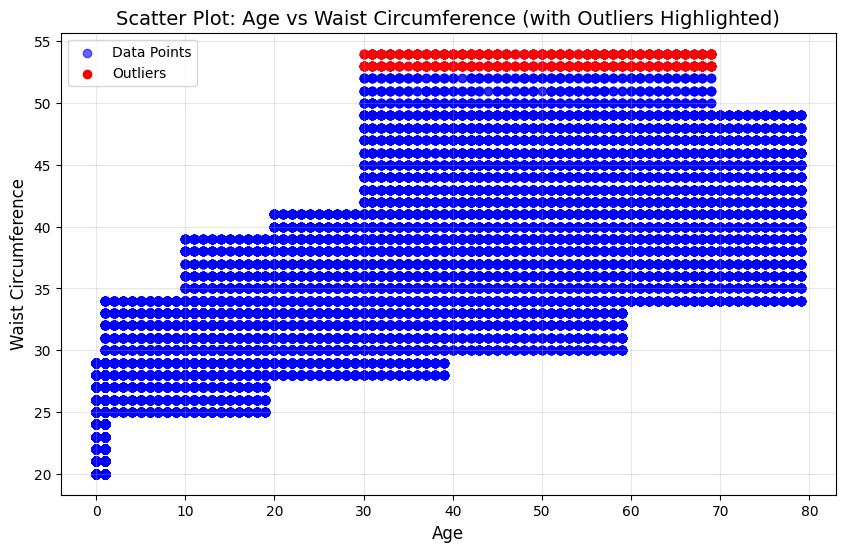

In [ ]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Waist Circumference'], alpha=0.6, label='Data Points', c='blue')
# plt.scatter(df['Blood Pressure'], df['Waist Circumference'], alpha=0.6, label='Data Points', c='blue')
# plt.scatter(df['BMI'], df['Waist Circumference'], alpha=0.6, label='Data Points', c='blue')

# Highlight outliers in red
outliers_wc = df[(df['Waist Circumference Z-Score'] > 2.5) | (df['Waist Circumference Z-Score'] < -2.5)]
plt.scatter(outliers_wc['Age'], outliers_wc['Waist Circumference'], color='red', label='Outliers')
# plt.scatter(outliers_wc['Blood Pressure'], outliers_wc['Waist Circumference'], color='red', label='Outliers')
# plt.scatter(outliers_wc['BMI'], outliers_wc['Waist Circumference'], color='red', label='Outliers')

# Add a title and labels
plt.title('Scatter Plot: Age vs Waist Circumference (with Outliers Highlighted)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Waist Circumference', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Display the plot
plt.show()

Plotting the relationship between age and waist circumference helps confirm whether the apparent outliers align with the trend or deviate significantly. The scatter shows that outliers are part of a clear trend, indicating they might not be true outliers.

the same where applied to BMI and Blood presure and the same result I got, so they are not outlaiers.

For Pulamnory Function feature, the histogram and central tendency shows that the it's normally distributed with negative skewness. As a result, I will try to used z-score to process outlaiers.

There is still outlaiers when decreasing sensitivity. therefore, we will try to have a look on the outlaiers values.

In [ ]:
pulmanory_mean = df['Pulmonary Function'].mean()
pulmanory_median = df['Pulmonary Function'].median()
pulmanory_mode = df['Pulmonary Function'].mode()[0]
pulmanory_variance = df['Pulmonary Function'].var()
pulmanory_std = df['Pulmonary Function'].std()
pulmanory_skewness = df['Pulmonary Function'].skew()
pulmanory_kurtosis = df['Pulmonary Function'].kurtosis()

# outliers_mean = pulmonary_outliers['Pulmonary Function'].mean()
# outliers_median = pulmonary_outliers['Pulmonary Function'].median()
# outliers_mode = pulmonary_outliers['Pulmonary Function'].mode()[0]

print(f"Mean of Pulmanory Function: {pulmanory_mean}")
print(f"Median Pulmanory Function: {pulmanory_median}")
print(f"Mode Pulmanory Function: {pulmanory_mode}")
print(f"Variance Pulmanory Function: {pulmanory_variance}")
print(f"Standard Deviation Pulmanory Function: {pulmanory_std}")
print(f"Skewness Pulmanory Function: {pulmanory_skewness}")
print(f"Kurtosis Pulmanory Function: {pulmanory_kurtosis}")

# print(f"Mean of outliers: {outliers_mean}")
# print(f"Median of outliers: {outliers_median}")
# print(f"Mode of outliers: {outliers_mode}")

Mean of Pulmanory Function: 70.26467142857143
Median Pulmanory Function: 72.0
Mode Pulmanory Function: 76
Variance Pulmanory Function: 143.1755801145998
Standard Deviation Pulmanory Function: 11.965599864386231
Skewness Pulmanory Function: -0.8126548864511098
Kurtosis Pulmanory Function: 0.5292976890703014


After consulting a domain expert, it was confirmed that the Pulmonary Function feature contains incorrect values. Specifically, a Pulmonary Function value below 50% is considered fatal and thus represents an outlier. These outliers must be addressed during preprocessing to ensure data quality and accurate model performance.

because Ppulmonary Function is negetively skewed, I will depend on the 5th percentile to handle the outlaiers.

Number of outliers: 1206
Percentage of outliers: 1.72%


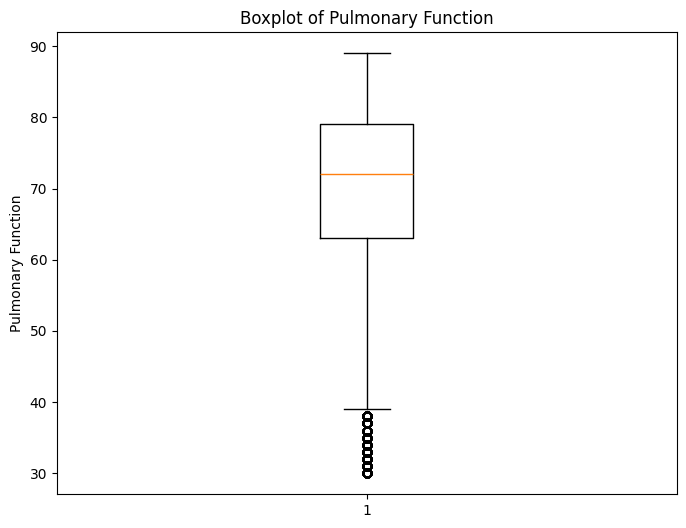

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column with Pulmonary Function data is 'Pulmonary Function'

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Pulmonary Function'].quantile(0.25)
Q3 = df['Pulmonary Function'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Pulmonary Function'] < lower_bound) | (df['Pulmonary Function'] > upper_bound)]

# Count outliers
num_outliers = outliers.shape[0]

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / df.shape[0]) * 100

# Print results
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

# Plot boxplot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Pulmonary Function'])
plt.title('Boxplot of Pulmonary Function')
plt.ylabel('Pulmonary Function')
plt.show()


Number of outliers below the 5th percentile: 3491
Percentage of outliers below the 5th percentile: 4.99%


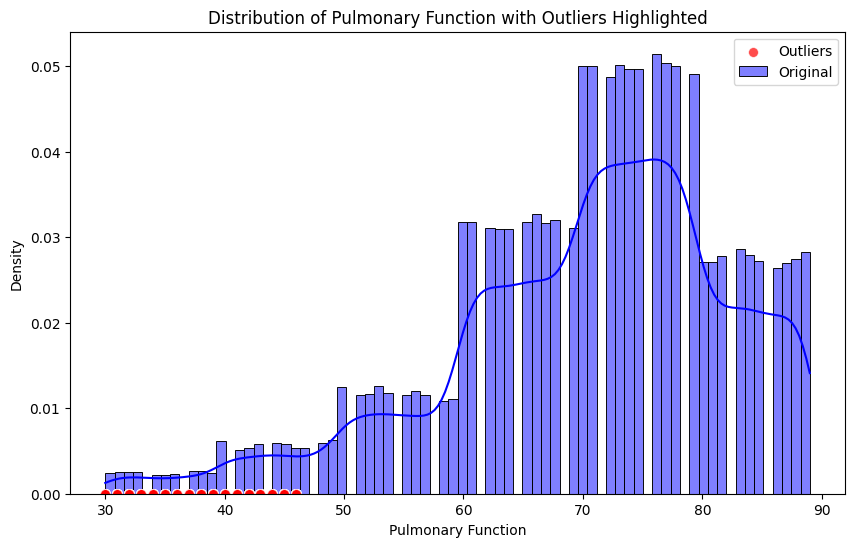

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 5th percentile for 'Pulmonary Function'
percentile_5 = np.percentile(df['Pulmonary Function'], 5)

# Identify outliers (values below the 5th percentile)
outliers = df[df['Pulmonary Function'] < percentile_5]

# Calculate the number and percentage of outliers
num_outliers = outliers.shape[0]
total_values = df.shape[0]
percentage_outliers = (num_outliers / total_values) * 100

# Print the number and percentage of outliers
print(f"Number of outliers below the 5th percentile: {num_outliers}")
print(f"Percentage of outliers below the 5th percentile: {percentage_outliers:.2f}%")

# Visualize the distribution of 'Pulmonary Function' with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Pulmonary Function'
sns.histplot(df['Pulmonary Function'], kde=True, color='blue', label='Original', stat='density')

# Highlight the outliers in red
sns.scatterplot(x=outliers['Pulmonary Function'], y=np.zeros_like(outliers['Pulmonary Function']),
                color='red', label='Outliers', s=50, alpha=0.7)

plt.title('Distribution of Pulmonary Function with Outliers Highlighted')
plt.xlabel('Pulmonary Function')
plt.ylabel('Density')
plt.legend()
plt.show()


Since the data is slightly skewed and outliers might heavily affect the mean, the median is a more robust choice for substitution.
This prevents the outliers from significantly altering the central tendency of the data.

In [ ]:
# Replace outliers with the mean
median_value = df['Pulmonary Function'].median()
df.loc[df['Pulmonary Function'] < percentile_5, 'Pulmonary Function'] = median_value

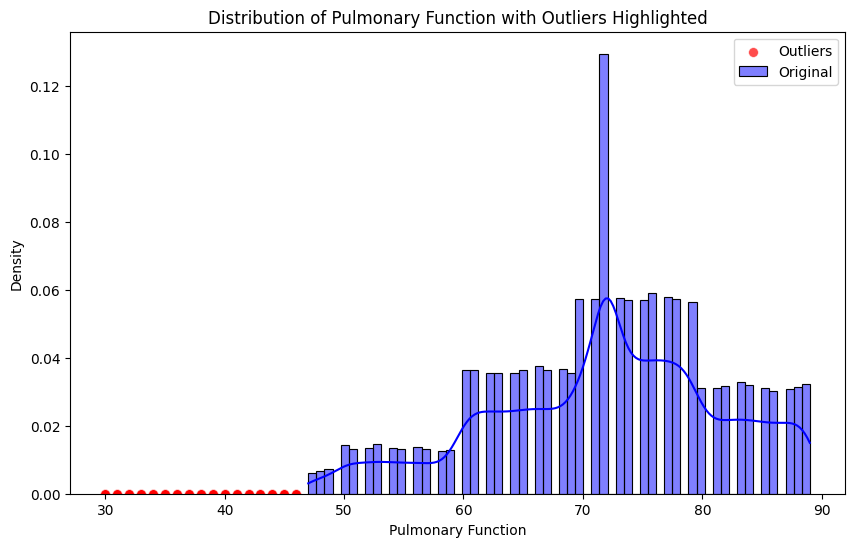

In [ ]:
# Visualize the distribution of 'Pulmonary Function' with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Pulmonary Function'
sns.histplot(df['Pulmonary Function'], kde=True, color='blue', label='Original', stat='density')

# Highlight the outliers in red
sns.scatterplot(x=outliers['Pulmonary Function'], y=np.zeros_like(outliers['Pulmonary Function']),
                color='red', label='Outliers', s=50, alpha=0.7)

plt.title('Distribution of Pulmonary Function with Outliers Highlighted')
plt.xlabel('Pulmonary Function')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
pulmonary_function = df['Pulmonary Function']

# Calculate mean, median, and mode
mean = pulmonary_function.mean()
median = pulmonary_function.median()
mode = pulmonary_function.mode()[0]
skewness = pulmonary_function.skew()

# Print mean, median, and mode
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Skewness Coefficient: {skewness:.2f}")

Mean: 71.87
Median: 72.00
Mode: 72.00
Skewness Coefficient: -0.36


Notice how the skweness imporved after replacing outliers with the median.

In [ ]:
# Calculate correlation between target and all other features
correlation = df.corr()
target_correlation = correlation['Target']

# Display the correlation with the target feature, sorted in descending order
sorted_target_correlation = target_correlation.sort_values(ascending=False)
print(sorted_target_correlation)

Target                               1.000000
Blood Glucose Levels                 0.652425
Neurological Assessments             0.238511
Blood Pressure                       0.050899
Waist Circumference Z-Score          0.046651
Waist Circumference                  0.046651
Glucose Tolerance Test_Normal        0.007535
History of PCOS_No                   0.006112
Urine Test_Glucose Present           0.005701
Environmental Factors_Absent         0.005690
Physical Activity_Moderate           0.005464
Urine Test_Normal                    0.005338
Early Onset Symptoms_Yes             0.004555
Genetic Markers_Positive             0.004078
Cystic Fibrosis Diagnosis_No         0.003408
Genetic Testing_Negative             0.003029
Alcohol Consumption_High             0.002514
Dietary Habits_Healthy               0.002253
Family History_Yes                   0.001989
Socioeconomic Factors_Medium         0.001859
Ethnicity_Low Risk                   0.001702
Age                               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Assuming 'df' has been prepared and encoded, and the target column is 'Target Encoded'
# Extract features and target
X = df.drop(columns='Target')  # All features except the target
y = df['Target']  # The target column

# Calculate information gain (mutual information) for all features
info_gain = mutual_info_classif(X, y)

# Create a DataFrame to show the feature names and their corresponding information gain
info_gain_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': info_gain
})

# Sort the DataFrame by information gain in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the information gain for each feature
print(info_gain_df)

                              Feature  Information Gain
1                                 Age          1.179191
3                      Blood Pressure          0.901521
6                Blood Glucose Levels          0.889904
7        Weight Gain During Pregnancy          0.882099
58        Waist Circumference Z-Score          0.839984
5                 Waist Circumference          0.832739
4                  Cholesterol Levels          0.800887
11            Digestive Enzyme Levels          0.719708
2                                 BMI          0.710369
0                      Insulin Levels          0.587709
9                  Pulmonary Function          0.541535
12                       Birth Weight          0.502356
8                   Pancreatic Health          0.472630
10           Neurological Assessments          0.307427
55         Urine Test_Protein Present          0.004899
25           Dietary Habits_Unhealthy          0.004424
28         Socioeconomic Factors_High          0

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate variance for all numerical features
variances = df.var()

# Create a DataFrame to display features and their variances
variance_df = variances.sort_values(ascending=False).reset_index()
variance_df.columns = ['Feature', 'Variance']

# Display the ranked features by variance
print("Features ranked by variance:")
print(variance_df)

# Optional: Save the results to a CSV file
# variance_df.to_csv("feature_variance_ranking.csv", index=False)

Features ranked by variance:
                              Feature       Variance
0                        Birth Weight  509563.691452
1                Blood Glucose Levels    2319.919962
2                  Cholesterol Levels    1983.140552
3                                 Age     442.815140
4                   Pancreatic Health     399.387550
5                      Blood Pressure     397.803022
6             Digestive Enzyme Levels     376.014342
7                      Insulin Levels     116.334604
8                  Pulmonary Function      93.166567
9        Weight Gain During Pregnancy      92.796541
10                Waist Circumference      46.287078
11                                BMI      36.171031
12                             Target      13.970794
13        Waist Circumference Z-Score       1.000014
14           Neurological Assessments       0.462609
15                 Ethnicity_Low Risk       0.250004
16                Ethnicity_High Risk       0.250004
17        Liver F

In [ ]:
# Set the number of top features to select
top_n = 4
# top_n = 8
# top_n = 12

# Calculate variance for each numeric column
variance = df.var(numeric_only=True)

# Create a DataFrame with features and their variance
variance_df = pd.DataFrame({'Feature': variance.index, 'Variance': variance.values})

# Sort the DataFrame by Variance in descending order
top_features_df = variance_df.sort_values(by='Variance', ascending=False).head(top_n)

# Reset the index for readability
top_features_df = top_features_df.reset_index(drop=True)

# Display the top features DataFrame
print(top_features_df)

                Feature       Variance
0          Birth Weight  509563.691452
1  Blood Glucose Levels    2319.919962
2    Cholesterol Levels    1983.140552
3                   Age     442.815140


Before Applying dimentionality reduction techniques, we first need to perform normalization to numerical features. Since most of the numberical features are almost uniformlity distributed, we will performe z-score normalization.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Target                             70000 non-null  int64  
 1   Insulin Levels                     70000 non-null  int64  
 2   Age                                70000 non-null  int64  
 3   BMI                                70000 non-null  int64  
 4   Blood Pressure                     70000 non-null  int64  
 5   Cholesterol Levels                 70000 non-null  int64  
 6   Waist Circumference                70000 non-null  int64  
 7   Blood Glucose Levels               70000 non-null  int64  
 8   Weight Gain During Pregnancy       70000 non-null  int64  
 9   Pancreatic Health                  70000 non-null  int64  
 10  Pulmonary Function                 70000 non-null  int64  
 11  Neurological Assessments           70000 non-null  int

In [ ]:
# Drop the 'Waist Circumference' column
df = df.drop(columns=['Waist Circumference'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it contains the specified columns

# List of columns to normalize
columns_to_normalize = [
    'Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
    'Blood Glucose Levels', 'Weight Gain During Pregnancy', 'Pancreatic Health',
    'Pulmonary Function', 'Neurological Assessments', 'Digestive Enzyme Levels',
    'Birth Weight'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized data
print("Normalized Data:")
print(df[columns_to_normalize].head())


Normalized Data:
   Insulin Levels       Age       BMI  Blood Pressure  Cholesterol Levels  \
0        1.705261  0.569277  2.197644        0.634773            0.137716   
1       -0.798037 -1.474156 -1.294096       -1.922277           -1.658739   
2        0.499969  0.189103 -0.130183        0.484358           -0.221575   
3       -1.261610 -1.189026 -1.460369       -0.568545           -0.985068   
4       -0.427178 -1.046461 -1.294096       -0.418130           -1.097347   

   Blood Glucose Levels  Weight Gain During Pregnancy  Pancreatic Health  \
0              0.151527                      0.259896          -0.578659   
1              0.359146                     -0.778199          -1.079046   
2             -1.156471                     -0.051533           0.422114   
3             -0.824281                     -0.362961           0.071843   
4              2.663714                     -1.401056          -1.879665   

   Pulmonary Function  Neurological Assessments  Digestive Enzy

Now the dataset is ready to Machine Learning Models. First we will start with Random Forest for the dataset without dimentionality reduction and using all features.

## Train Test Split

Before model training and testing, first we will split the dataset to training and testing.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your preprocessed DataFrame and has a 'target' column (or similar) as the label.

# Step 1: Prepare the feature set (X) and target variable (y)
# Replace 'target' with the actual column name that you want to predict
X = df.drop(columns=['Target'])  # Drop the target column
y = df['Target']  # Replace 'target' with the actual name of the target column

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can print the shapes of the split data to verify
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (49000, 58), Test data shape: (21000, 58)


The dataset was splitted to 30% testing and 70% training.

## Random Forest

Apply random forset for the preprocessed dataset and the perforance mesures will be produced such as accuracy, precision, recall and F1 mesaure.

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd

# Define Random Forest hyperparameter grid
rf_params = {'n_estimators': [10, 15, 20, 30, 40, 50], 'max_depth': [None, 10, 20]}

# Initialize a list to store results
model_performance = []

# Loop through all combinations of hyperparameters
total_start_time = time.time()

for n_estimators in rf_params['n_estimators']:
    for max_depth in rf_params['max_depth']:
        print(f"\nTraining Model with Parameters: n_estimators={n_estimators}, max_depth={max_depth}")

        # Initialize the Random Forest model
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=0,
            n_jobs=-1,
            criterion="entropy"
        )

        # Record the start time of training
        model_train_start_time = time.time()

        # Train the model
        rf_model.fit(X_train, y_train)

        # Record the end time of training
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Make predictions on the test set
        model_test_start_time = time.time()
        y_pred = rf_model.predict(X_test)
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print metrics for the current model
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Store metrics for comparison
        model_performance.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)



Training Model with Parameters: n_estimators=10, max_depth=None
Training Time: 1.01 seconds
Testing Time: 0.05 seconds
Accuracy: 0.8693
Precision: 0.8695
Recall: 0.8693
F1-Score: 0.8685

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1610
           1       0.86      0.84      0.85      1587
           2       0.91      0.91      0.91      1608
           3       0.92      0.87      0.89      1756
           4       1.00      1.00      1.00      1547
           5       0.95      0.98      0.97      1614
           6       0.73      0.69      0.71      1621
           7       0.77      0.74      0.75      1609
           8       0.88      0.97      0.92      1691
           9       0.81      0.74      0.77      1607
          10       0.77      0.90      0.83      1605
          11       0.89      0.89      0.89      1588
          12       0.89      0.89      0.89      1557

    accuracy                   

In order to good hyperparameter tuning, I tested differant n_estimators which is the number of tree in the modle. When n_estimators is 10 Accuracy: 0.8693
Precision: 0.8695, Recall: 0.8693 and F1 Score: 0.8685. then increased to 15 Accuracy: 0.8808, Precision: 0.8822, Recall: 0.8808 and F1 Score: 0.8798. Then to 20 Accuracy: 0.8843, Precision: 0.8860, Recall: 0.8843 and F1 Score: 0.8832. and so on till reacing 40 where the performance mesure became Accuracy: 0.8916, Precision: 0.8944, Recall: 0.8916 and F1 Score: 0.8904. After 40 any increase in n_estimators increase the model complexity and the computational time and the performance metrix keep almost the same. Therefore, the n_estimators is pinned to 40.

However, when n_estimators increase the required time for training and testing increase, so 40 is a good choice, because below it the model perform less and increase it after 40 will make the model slower and complex without much imporvment.

random_state is set to zero to ensures the model’s results are reproducible across different runs by setting a fixed random seed.

n_jobs was was pinned to -1 to use all available processors.

evaluate the quality of splits by using 'éntropy' in criterion hyperparameter.

Moreover, this report breaks down the performance of the model on each class (from 0 to 12) in terms of precision, recall, and f1-score.

The confusion matrix shows how many times instances from each class were misclassified as another class. Each row of the matrix represents the true class, and each column represents the predicted class.

For example: The first row shows how instances of class 0 were classified. The majority of class 0 instances were correctly predicted (1394), but some were misclassified as class 1 (121) or other classes.

## Random Forest - PCA

Now, we will performe PCA for dimensionality reduction while and tracking the effect on model performance.

In [ ]:
import time
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined.

# Initialize lists for storing performance metrics
accuracy_list = []
precision_list = []
f1_list = []
recall_list = []  # List to store recall values
training_time_list = []  # List to store training times

n_components_list = [1, 2, 4, 8, 16, 30, 32, 40]

# DataFrame to store features after PCA
last_pca_features_train = pd.DataFrame()
last_pca_features_test = pd.DataFrame()

# Loop over different numbers of principal components
for idx, n_components in enumerate(n_components_list):
    # Initialize PCA with the desired number of components
    pca = PCA(n_components=n_components)

    # Fit PCA on the training set and transform it
    X_train_pca = pca.fit_transform(X_train)

    # Transform the testing set using the PCA fitted on the training set
    X_test_pca = pca.transform(X_test)

    # If this is the last iteration, store the PCA-transformed data
    if idx == len(n_components_list) - 1:
        last_pca_features_train = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_components)])
        last_pca_features_test = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(n_components)])

    # Initialize the Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=40, random_state=0, n_jobs=-1, criterion="entropy")

    # Record the start time of training
    start_time = time.time()

    # Train the model with PCA-transformed features
    rf_model.fit(X_train_pca, y_train)

    # Record the end time of training
    end_time = time.time()

    # Calculate the training time
    training_time = end_time - start_time
    training_time_list.append(training_time)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test_pca)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_components = {n_components}: Accuracy = {accuracy * 100:.2f}%")

    # Optional: Get detailed classification metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Optional: Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate recall score
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' averages across all classes
    print(f"\nRecall (Weighted): {recall * 100:.2f}%")

    # Store performance metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision_score(y_test, y_pred, average='weighted'))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))
    recall_list.append(recall)  # Store recall

    # Feature importance (from Random Forest model)
    feature_importances = rf_model.feature_importances_
    features = [f"PC{i+1}" for i in range(n_components)]  # PCA components are named PC1, PC2, etc.
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Optional: Store or print summary results
print("Summary of performance across different n_components:")
for i, n_components in enumerate(n_components_list):
    print(f"n_components = {n_components}:")
    print(f"  Accuracy: {accuracy_list[i]:.4f}")
    print(f"  Precision: {precision_list[i]:.4f}")
    print(f"  Recall: {recall_list[i]:.4f}")  # Include recall in the summary
    print(f"  F1 Score: {f1_list[i]:.4f}")
    print(f"  Training Time: {training_time_list[i]:.2f} seconds")  # Include training time in the summary
    print("-" * 40)

# Output the last PCA-transformed DataFrame
print("\nLast PCA-transformed training features:")
print(last_pca_features_train.head())

print("\nLast PCA-transformed testing features:")
print(last_pca_features_test.head())

n_components = 1: Accuracy = 33.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.25      0.24      1610
           1       0.23      0.22      0.22      1587
           2       0.22      0.21      0.22      1608
           3       0.34      0.33      0.33      1756
           4       0.68      0.69      0.68      1547
           5       0.27      0.27      0.27      1614
           6       0.24      0.24      0.24      1621
           7       0.22      0.23      0.22      1609
           8       0.48      0.48      0.48      1691
           9       0.34      0.34      0.34      1607
          10       0.25      0.25      0.25      1605
          11       0.44      0.44      0.44      1588
          12       0.44      0.42      0.43      1557

    accuracy                           0.34     21000
   macro avg       0.34      0.34      0.34     21000
weighted avg       0.34      0.34      0.34     21000


Confusion Matrix:


Notice when increasing the number of components the performance matrix improved. But overall, the perforamce matrix without dimentionality reduction is much better. This may happened due to removal of some features which may hove contribution for evaluating and predicting the traget.

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd

# Define Random Forest hyperparameter grid
rf_params = {'n_estimators': [10, 15, 20, 30, 40, 50], 'max_depth': [None, 10, 20]}

# Initialize lists to store results
model_performance = []
total_start_time = time.time()

# Loop through all combinations of hyperparameters
for n_estimators in rf_params['n_estimators']:
    for max_depth in rf_params['max_depth']:
        print(f"\nTraining Model with Parameters: n_estimators={n_estimators}, max_depth={max_depth}")

        # Initialize the model with specific parameters
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=0,
            criterion="entropy",
            n_jobs=-1
        )

        # Measure training time for this model
        model_train_start_time = time.time()
        model.fit(last_pca_features_train, y_train)
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Measure testing time for this model
        model_test_start_time = time.time()
        y_pred = model.predict(last_pca_features_test)
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print and store the performance
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Save performance metrics for later comparison
        model_performance.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)


Training Model with Parameters: n_estimators=10, max_depth=None
Training Time: 11.76 seconds
Testing Time: 0.05 seconds
Accuracy: 0.6787
Precision: 0.6808
Recall: 0.6787
F1-Score: 0.6789

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1610
           1       0.58      0.63      0.60      1587
           2       0.74      0.71      0.72      1608
           3       0.67      0.67      0.67      1756
           4       0.95      0.98      0.97      1547
           5       0.75      0.72      0.73      1614
           6       0.47      0.55      0.51      1621
           7       0.54      0.51      0.53      1609
           8       0.75      0.77      0.76      1691
           9       0.61      0.53      0.57      1607
          10       0.57      0.53      0.55      1605
          11       0.74      0.79      0.76      1588
          12       0.81      0.73      0.77      1557

    accuracy                  

The increased training time when using PCA likely stems from the overhead involved in performing PCA, especially for higher n_components.

## SVM

Now, let's try to train the model using SVM for two datasets: dateset with all features, and dataset after performing dimentionality reduction using PCA.

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd

# Define SVM hyperparameter grid
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize lists to store results
model_performance = []
total_start_time = time.time()

# Loop through all combinations of hyperparameters
for C_value in svm_params['C']:
    for kernel_type in svm_params['kernel']:
        print(f"\nTraining Model with Parameters: C={C_value}, kernel={kernel_type}")

        # Initialize the model with specific parameters
        model = SVC(C=C_value, kernel=kernel_type, random_state=0)

        # Measure training time for this model
        model_train_start_time = time.time()
        model.fit(X_train, y_train)
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Measure testing time for this model
        model_test_start_time = time.time()
        y_pred = model.predict(X_test)
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print and store the performance
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Save performance metrics for later comparison
        model_performance.append({
            'C': C_value,
            'Kernel': kernel_type,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)


Training Model with Parameters: C=0.1, kernel=linear
Training Time: 20.41 seconds
Testing Time: 24.01 seconds
Accuracy: 0.7633
Precision: 0.7633
Recall: 0.7633
F1-Score: 0.7631

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1610
           1       0.68      0.72      0.70      1587
           2       0.82      0.81      0.82      1608
           3       0.79      0.77      0.78      1756
           4       1.00      1.00      1.00      1547
           5       0.79      0.78      0.78      1614
           6       0.63      0.57      0.60      1621
           7       0.58      0.58      0.58      1609
           8       0.83      0.86      0.84      1691
           9       0.70      0.74      0.72      1607
          10       0.60      0.62      0.61      1605
          11       0.86      0.86      0.86      1588
          12       0.86      0.86      0.86      1557

    accuracy                           0

## SVM - PCA


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd

# Define SVM hyperparameter grid
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize lists to store results
model_performance = []
total_start_time = time.time()

# Loop through all combinations of hyperparameters
for C_value in svm_params['C']:
    for kernel_type in svm_params['kernel']:
        print(f"\nTraining Model with Parameters: C={C_value}, kernel={kernel_type}")

        # Initialize the model with specific parameters
        model = SVC(C=C_value, kernel=kernel_type, random_state=0)

        # Measure training time for this model
        model_train_start_time = time.time()
        model.fit(last_pca_features_train, y_train)
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Measure testing time for this model
        model_test_start_time = time.time()
        y_pred = model.predict(last_pca_features_test)
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print and store the performance
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Save performance metrics for later comparison
        model_performance.append({
            'C': C_value,
            'Kernel': kernel_type,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)


Training Model with Parameters: C=0.1, kernel=linear
Training Time: 17.54 seconds
Testing Time: 19.97 seconds
Accuracy: 0.7634
Precision: 0.7633
Recall: 0.7634
F1-Score: 0.7631

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1610
           1       0.68      0.72      0.70      1587
           2       0.82      0.81      0.82      1608
           3       0.79      0.77      0.78      1756
           4       1.00      1.00      1.00      1547
           5       0.79      0.78      0.78      1614
           6       0.63      0.57      0.60      1621
           7       0.58      0.58      0.58      1609
           8       0.83      0.86      0.84      1691
           9       0.70      0.74      0.72      1607
          10       0.60      0.62      0.61      1605
          11       0.86      0.86      0.86      1588
          12       0.86      0.86      0.86      1557

    accuracy                           0

## MLP

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd

# Define MLP hyperparameter grid
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['tanh', 'relu']}

# Initialize lists to store results
model_performance = []
total_start_time = time.time()

# Loop through all combinations of hyperparameters
for hidden_layer in mlp_params['hidden_layer_sizes']:
    for activation_function in mlp_params['activation']:
        print(f"\nTraining Model with Parameters: hidden_layer_sizes={hidden_layer}, activation={activation_function}")

        # Initialize the MLP model with specific parameters
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            activation=activation_function,
            random_state=0,
            max_iter=200
        )

        # Measure training time for this model
        model_train_start_time = time.time()
        model.fit(X_train, y_train)
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Measure testing time for this model
        model_test_start_time = time.time()
        y_pred = model.predict(X_test)
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print and store the performance
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Save performance metrics for later comparison
        model_performance.append({
            'Hidden Layer Sizes': hidden_layer,
            'Activation': activation_function,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)



Training Model with Parameters: hidden_layer_sizes=(50,), activation=tanh


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 56.71 seconds
Testing Time: 0.05 seconds
Accuracy: 0.8433
Precision: 0.8450
Recall: 0.8433
F1-Score: 0.8425

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1610
           1       0.81      0.79      0.80      1587
           2       0.87      0.88      0.88      1608
           3       0.85      0.82      0.83      1756
           4       0.99      1.00      1.00      1547
           5       0.91      0.91      0.91      1614
           6       0.74      0.71      0.72      1621
           7       0.78      0.72      0.75      1609
           8       0.85      0.91      0.88      1691
           9       0.83      0.70      0.76      1607
          10       0.72      0.92      0.81      1605
          11       0.89      0.86      0.87      1588
          12       0.87      0.89      0.88      1557

    accuracy                           0.84     21000
   macro avg       0.85      0.84      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 49.66 seconds
Testing Time: 0.03 seconds
Accuracy: 0.8500
Precision: 0.8516
Recall: 0.8500
F1-Score: 0.8492

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1610
           1       0.83      0.81      0.82      1587
           2       0.90      0.88      0.89      1608
           3       0.85      0.83      0.84      1756
           4       1.00      1.00      1.00      1547
           5       0.91      0.95      0.93      1614
           6       0.72      0.72      0.72      1621
           7       0.82      0.68      0.74      1609
           8       0.84      0.92      0.88      1691
           9       0.81      0.74      0.77      1607
          10       0.74      0.92      0.82      1605
          11       0.89      0.87      0.88      1588
          12       0.87      0.89      0.88      1557

    accuracy                           0.85     21000
   macro avg       0.85      0.85      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 81.62 seconds
Testing Time: 0.07 seconds
Accuracy: 0.8340
Precision: 0.8341
Recall: 0.8340
F1-Score: 0.8335

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1610
           1       0.81      0.80      0.80      1587
           2       0.88      0.88      0.88      1608
           3       0.84      0.82      0.83      1756
           4       0.99      1.00      1.00      1547
           5       0.91      0.91      0.91      1614
           6       0.75      0.65      0.70      1621
           7       0.72      0.74      0.73      1609
           8       0.86      0.88      0.87      1691
           9       0.76      0.76      0.76      1607
          10       0.73      0.82      0.78      1605
          11       0.85      0.87      0.86      1588
          12       0.87      0.85      0.86      1557

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP - PCA

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# Assuming last_pca_features_train and last_pca_features_test (from PCA transformation) are available
# and y_train, y_test are the original labels.

# Define MLP hyperparameter grid
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['tanh', 'relu']}

# Initialize lists to store results
model_performance = []
total_start_time = time.time()

# Loop through all combinations of hyperparameters
for hidden_layer in mlp_params['hidden_layer_sizes']:
    for activation_function in mlp_params['activation']:
        print(f"\nTraining Model with Parameters: hidden_layer_sizes={hidden_layer}, activation={activation_function}")

        # Initialize the MLP model with specific parameters
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            activation=activation_function,
            random_state=0,
            max_iter=200
        )

        # Measure training time for this model
        model_train_start_time = time.time()
        model.fit(last_pca_features_train, y_train)  # Use PCA-transformed training features
        model_train_end_time = time.time()
        model_training_time = model_train_end_time - model_train_start_time

        # Measure testing time for this model
        model_test_start_time = time.time()
        y_pred = model.predict(last_pca_features_test)  # Use PCA-transformed test features
        model_test_end_time = time.time()
        model_testing_time = model_test_end_time - model_test_start_time

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        classification_report_str = classification_report(y_test, y_pred)
        confusion_matrix_data = confusion_matrix(y_test, y_pred)

        # Print and store the performance
        print(f"Training Time: {model_training_time:.2f} seconds")
        print(f"Testing Time: {model_testing_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report_str)
        print("\nConfusion Matrix:")
        print(confusion_matrix_data)

        # Save performance metrics for later comparison
        model_performance.append({
            'Hidden Layer Sizes': hidden_layer,
            'Activation': activation_function,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training Time (s)': model_training_time,
            'Testing Time (s)': model_testing_time
        })

total_end_time = time.time()
total_training_time = total_end_time - total_start_time

print(f"\nTotal Time for Training All Models: {total_training_time:.2f} seconds")

# Convert performance data to DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)
print("\nModel Performance Summary:")
print(performance_df)


Training Model with Parameters: hidden_layer_sizes=(50,), activation=tanh


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 105.55 seconds
Testing Time: 0.15 seconds
Accuracy: 0.8410
Precision: 0.8425
Recall: 0.8410
F1-Score: 0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1610
           1       0.81      0.80      0.81      1587
           2       0.88      0.87      0.88      1608
           3       0.82      0.83      0.83      1756
           4       0.99      1.00      0.99      1547
           5       0.89      0.92      0.91      1614
           6       0.74      0.67      0.71      1621
           7       0.80      0.67      0.73      1609
           8       0.85      0.89      0.87      1691
           9       0.78      0.77      0.78      1607
          10       0.72      0.91      0.80      1605
          11       0.90      0.85      0.88      1588
          12       0.87      0.91      0.89      1557

    accuracy                           0.84     21000
   macro avg       0.84      0.84      0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 62.59 seconds
Testing Time: 0.02 seconds
Accuracy: 0.8528
Precision: 0.8539
Recall: 0.8528
F1-Score: 0.8517

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1610
           1       0.83      0.81      0.82      1587
           2       0.88      0.89      0.89      1608
           3       0.86      0.84      0.85      1756
           4       1.00      1.00      1.00      1547
           5       0.92      0.93      0.93      1614
           6       0.76      0.68      0.72      1621
           7       0.79      0.70      0.75      1609
           8       0.86      0.92      0.88      1691
           9       0.80      0.74      0.77      1607
          10       0.73      0.94      0.82      1605
          11       0.89      0.87      0.88      1588
          12       0.87      0.89      0.88      1557

    accuracy                           0.85     21000
   macro avg       0.85      0.85      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 146.74 seconds
Testing Time: 0.19 seconds
Accuracy: 0.8269
Precision: 0.8271
Recall: 0.8269
F1-Score: 0.8263

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1610
           1       0.80      0.80      0.80      1587
           2       0.87      0.88      0.88      1608
           3       0.84      0.82      0.83      1756
           4       0.99      1.00      1.00      1547
           5       0.91      0.91      0.91      1614
           6       0.70      0.64      0.67      1621
           7       0.73      0.66      0.70      1609
           8       0.85      0.89      0.87      1691
           9       0.74      0.75      0.74      1607
          10       0.70      0.83      0.76      1605
          11       0.88      0.85      0.87      1588
          12       0.86      0.88      0.87      1557

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 80.96 seconds
Testing Time: 0.06 seconds
Accuracy: 0.8430
Precision: 0.8442
Recall: 0.8430
F1-Score: 0.8421

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1610
           1       0.81      0.79      0.80      1587
           2       0.87      0.91      0.89      1608
           3       0.84      0.82      0.83      1756
           4       0.99      1.00      1.00      1547
           5       0.90      0.91      0.91      1614
           6       0.75      0.68      0.71      1621
           7       0.80      0.68      0.74      1609
           8       0.85      0.89      0.87      1691
           9       0.79      0.77      0.78      1607
          10       0.73      0.92      0.81      1605
          11       0.89      0.86      0.87      1588
          12       0.87      0.89      0.88      1557

    accuracy                           0.84     21000
   macro avg       0.84      0.84      0.